In [7]:
# import libraries
from dash import Dash,dcc, html, Input, Output
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

In [2]:
breaks = html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br()

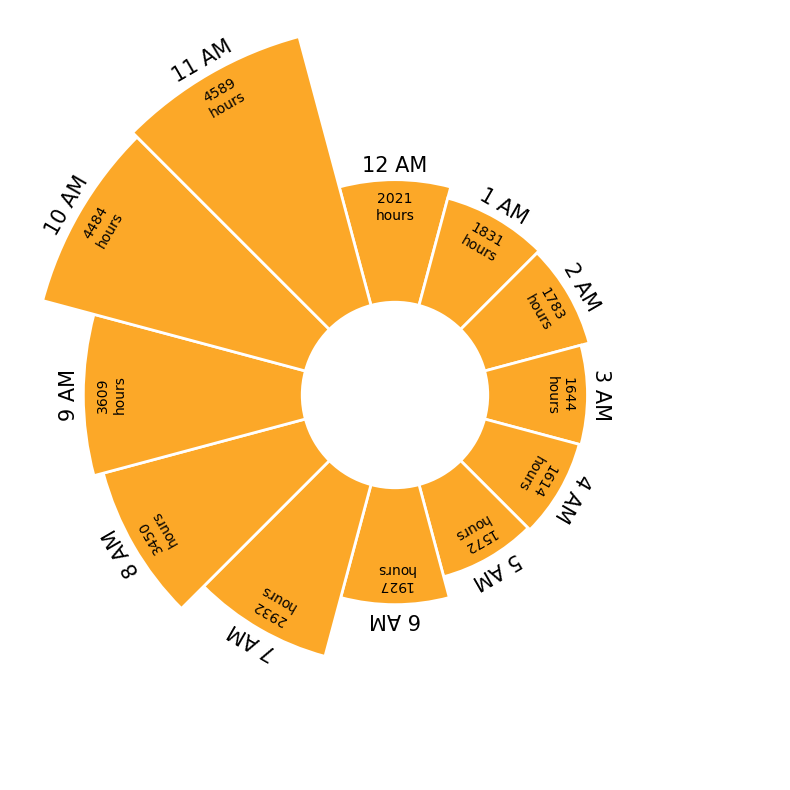

In [124]:
data = pd.read_csv('../DATA/data.csv')

# group by the hour of the day and find the number of minutes 
hours = data.groupby('hour')['minutes'].sum()
# change the index 
hours.index = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, \
               3, 4, 5, 6, 7, 8, 9, 10, 11]
hoursam = hours.iloc[:12]
hourspm = hours.iloc[12:]

#initialize the plot 
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hoursam.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hoursam + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hoursam.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hoursam)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#fca828",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hoursam.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} AM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 


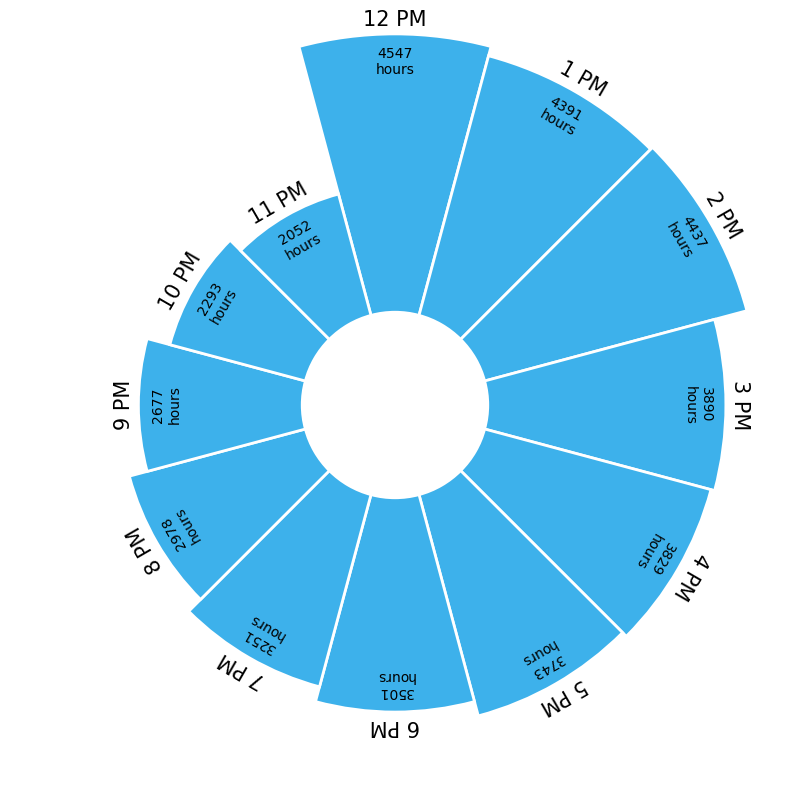

In [125]:
#initialize the plot 
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Compute max and min in the dataset
max = hourspm.max()

# Set the coordinates limits
upperLimit = max
lowerLimit = max/3

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * hourspm + lowerLimit

#Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(hourspm.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(hourspm)+1))
angles = [element * width * -1 + np.deg2rad(120) for element in indexes]


# add bars 
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#3db1eb",
)

# little space between the bar and the label
labelPadding = max/20


# Add labels
for bar, angle, height, label in zip(bars,angles, heights, hourspm.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() - 2*labelPadding, 
        s=f'{round(height)}\nhours', 
        ha='center', 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Add more lables labels
for bar, angle, height, label in zip(bars,angles, heights, hourspm.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)-90

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f'{label} PM', 
        ha='center', 
        va='center',
        size = 15,
        rotation=rotation, 
        rotation_mode="anchor") 



In [3]:
stylesheet = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = Dash(__name__, external_stylesheets=stylesheet)

data = pd.read_csv('../DATA/data.csv')


left1 = [
    html.H1("My Listening Habits"),
    html.H2("Insert Number"),
    html.P("Total Streaming Minutes"),
    html.H2("Insert Number"),
    html.P("Different Songs"),
    html.H2("Insert Number"),
    html.P("Different Artists"),
    html.P('Between mm/dd/yy and mm/dd/yy')
]

app.layout = html.Div( # entire page
    [
        html.Div( # Top of Page 
            [
                html.H1("Title"), # title 
                html.H3("Description"), # description
            ],style={"border":"2px solid pink", 'margin':'5px'}),

        html.Div(# Bottom of Page 
            [ 
                html.Div( # left side of page 
                    [
                        html.Div(breaks, # left 3 col of left 
                                className= "four columns", 
                                style={'margin':'5px', 'backgroundColor':"#750202"}), 
                        
                        html.Div(# right 6 col of left 
                            [html.Div("WIDGETS", style={'backgroundColor':'#eb343d', 'margin':'5px'}),
                             html.Div(['PLOT 1', html.Br(), html.Br(), html.Br()], style={'backgroundColor':'#8c1d59','margin':'5px'}),
                             html.Div("MORE WIDGETS", style={'backgroundColor':'#d10a76', 'margin':'5px'}), 
                             html.Div(# two bottom plots
                                 [
                                     html.Div("PLOT 2", className='six columns', style={'backgroundColor':'#f08dd2', 'margin':'5px'}), 
                                     html.Div("PLOT 3", className='six columns', style={'backgroundColor':'#f08dd2', 'margin':'5px'})
                                 ])
                            
                            ], className='eight columns', style ={'margin':'5px'})
                    ], className='nine columns', style={"border":"2px solid pink"}),
                
                html.Div(breaks, 
                        style={"border":"2px solid pink"}, className='three columns')
            ])
    ], style={"border":"2px solid pink"}, className = 'row')

if __name__ == '__main__':
    app.run_server(jupyter_mode='tab', debug=True)

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>